# Attention!
The results presented in our report have been obtained with the following system specifications:

    Python version
    3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
    [GCC 7.2.0]
    Version info.
    sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)

# Necessary modules

code needed for the reproduction of the results stated in "Crowded enzyme kinetics using simulation and machine learning"

In [2]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

import regressions  
import reproduction
import figure_generation

# Reproduction

Reproduce the model described in the original article, which is a weighted linear model (see the report for more details on the weigthing process).

It outputs a .csv file containing the estimate of the coefficient and store it in `../results/reproduction.csv`

In [8]:
#load file
file = "../Data/result_full_factorial_pgm.csv"

#prepare the data_set
data = reproduction.Data_prep_replication(file)

#computation of the coefficients
results = reproduction.regression_results(data)

#save the results
results.to_csv('../results/reproduction.csv')
results.head()

Median of the Massdistribution in kDa  \
                                          
0                                  31.9   
1                                  31.9   
2                                  31.9   
3                                  31.9   
4                                  31.9   

  Sigma parameter of the Massdistribution Volume fraction Rate constant  \
                                                                          
0                                   0.825             0.0        k1_bwd   
1                                   0.825             0.0        k1_fwd   
2                                   0.825             0.0        k2_bwd   
3                                   0.825             0.0        k2_fwd   
4                                   0.825             0.1        k1_bwd   

       beta                               alpha E                ...       \
   Estimate     0.025     0.975 p-value  Estimate     0.025      ...        
0 -0.014756 -0.014822 -0.014691     0.0 -0.000190 -0.000317      ...        
1  0.073132  0.070293  0.075971     0.0  0.010658  0.003545      ...        
2  0.068795  0.065675  0.071915     0.0  0.000481 -0.005600      ...        
3 -0.014756 -0.014821 -0.014690     0.0 -0.000190 -0.000317      ...        
4 -0.117351 -0.117510 -0.117192     0.0  0.001708  0.001396      ...        

   alpha ES                  alpha P                                    \
      0.975        p-value  Estimate     0.025     0.975       p-value   
0  0.000109   7.713487e-01 -0.002936 -0.002976 -0.002896  0.000000e+00   
1  0.011204   8.019231e-02  0.000256 -0.001460  0.001971  7.701728e-01   
2  0.006852   7.308795e-01  0.006592  0.004601  0.008584  9.199772e-11   
3  0.000108   7.688221e-01 -0.002936 -0.002976 -0.002896  0.000000e+00   
4  0.003771  5.107549e-100 -0.003575 -0.003673 -0.003478  0.000000e+00   

    alpha S                                    
   Estimate     0.025     0.975       p-value  
0 -0.002936 -0.002976 -0.002896  0.000000e+00  
1  0.004736  0.002871  0.006600  6.552938e-07  
2 -0.000230 -0.002004  0.001545  7.996240e-01  
3 -0.002936 -0.002976 -0.002896  0.000000e+00  
4 -0.003564 -0.003661 -0.003468  0.000000e+00  

[5 rows x 24 columns]

Running the following part will give you the exploratory data analysis plot (Fig. 1 in the report)

This take some time as there are 16 subplots to produce

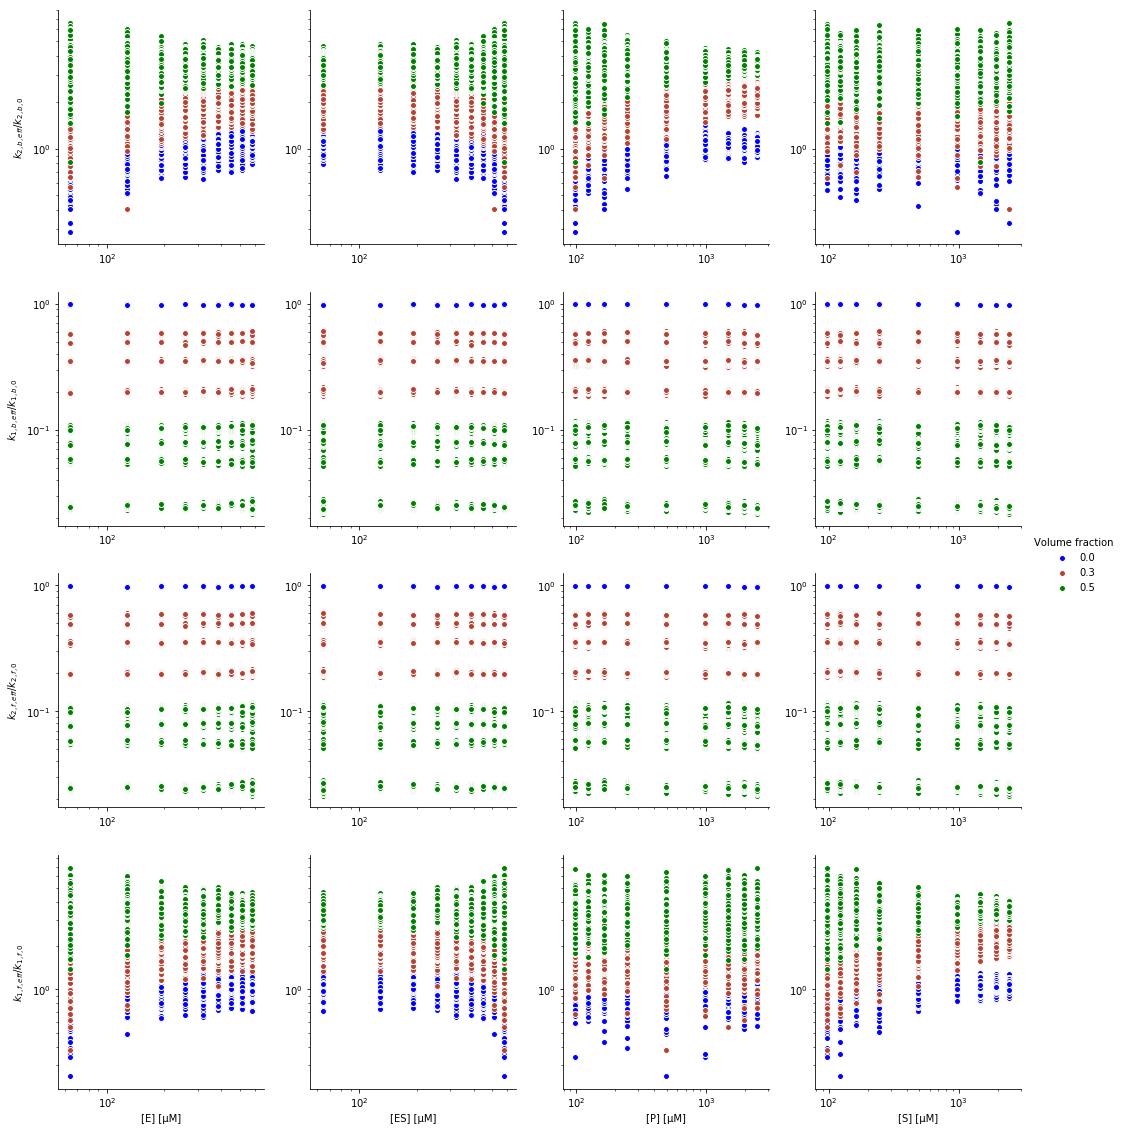

In [2]:
#path to the data file
file = "../Data/result_full_factorial_pgm.csv"


#plots and save the figure
figure_generation.plot_fig2_plot(file, save = True) #comment to avoid saving it again


# New models

Here we train the models we discuss in the report. The parameter are set by default to the optimal ones (found through cross validation) 

### Ridge regression

The following model fits the degree-2-polynomial design

In [3]:
ridgeRegPoly2 = regressions.reproduction_ridge()
ridgeRegPoly2.scores

,R^2 train score,R^2 test score,MSE train score,MSE test score
k1_bwd_effective,0.988743,0.988731,0.012551,0.012533
k1_fwd_effective,0.869150,0.867772,0.021762,0.022036
k2_bwd_effective,0.882551,0.881837,0.019576,0.019809
k2_fwd_effective,0.987505,0.987513,0.013931,0.013887


In [13]:
ridgeRegInteractions = regressions.reproduction_ridge(interaction_only= True)
ridgeRegInteractions.scores

,MSE test score,MSE train score,R^2 test score,R^2 train score
k1_bwd_effective,0.930287,0.929539,0.077725,0.078364
k1_fwd_effective,-477.375359,-478.636582,79.559251,79.934249
k2_bwd_effective,0.689472,0.688153,0.051759,0.052278
k2_fwd_effective,0.929611,0.928910,0.078478,0.079063


### Svr regression 
#### takes a lot of time (more or less 6 hours)

The following model corresponds to SVR on basic design

In [ ]:
svrRegSimple = regressions.reproduction_svr(interactions=False)
svrRegSimple.scores

The following model is the SVR fitted on the interaction (2 by 2 feature products) design

In [ ]:
svrRegInteractions = regressions.reproduction_svr()
svrRegInteractions.scores

### Xgboost regression

This is our best model, fitted on the reduced design (as explained in report).

In [ ]:
xgboostReg = regressions.reproduction_XGBoost()

In [ ]:
xgboostReg.scores 